In [1]:
import numpy as np
from Data_processing_82 import getDataEC
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
import seaborn as sns
sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

0.02530712084401442
0.02459417867404451
0.022322490297117106
0.01881583891683976
0.014517625284827758
0.011534620684775019


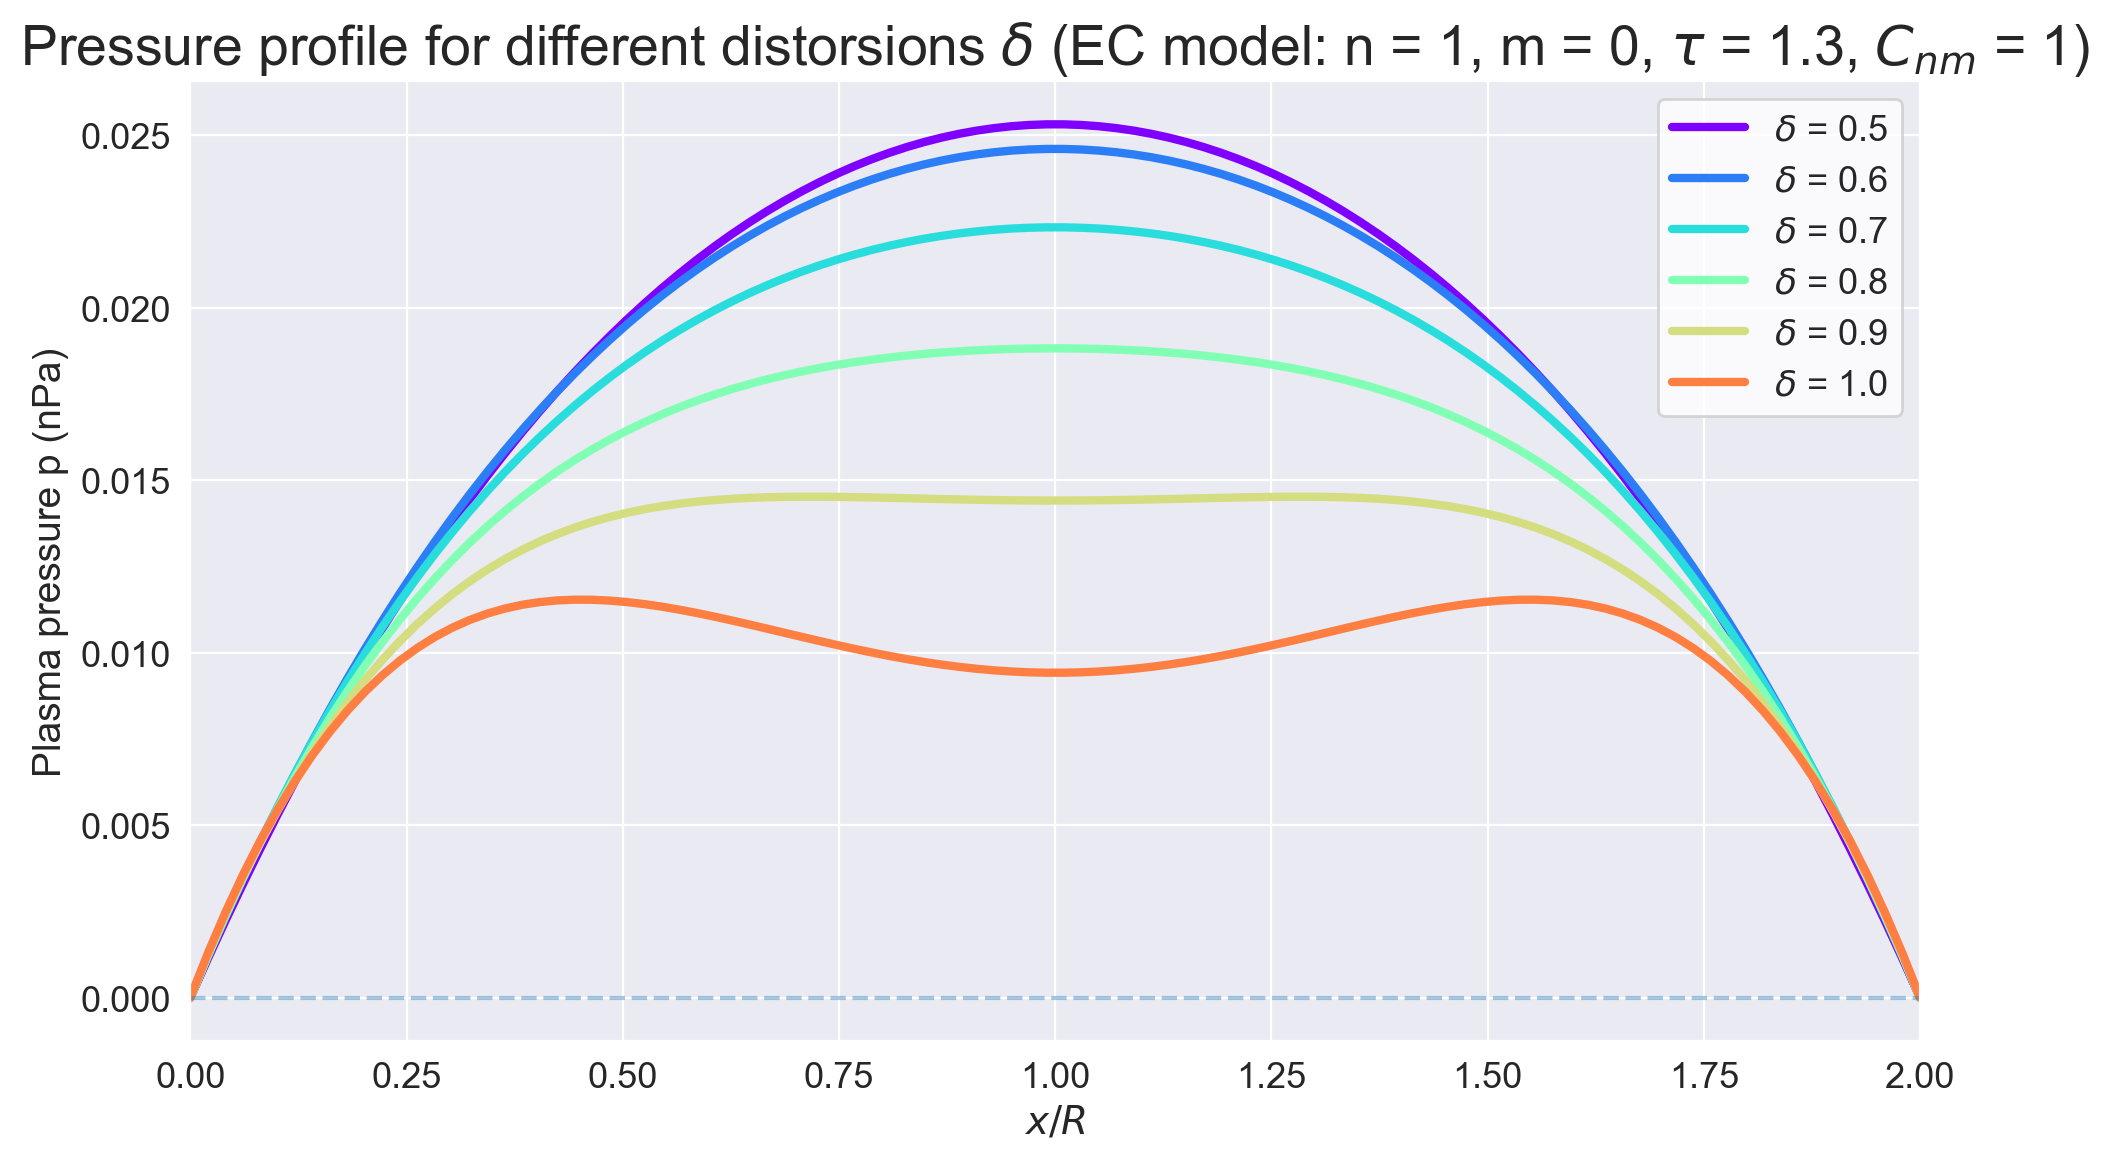

In [221]:
fig, ax = plt.subplots(figsize=(10,6), dpi = 200, tight_layout=True)
r = np.linspace(0, 1, 100)

m = 6
cm = plt.get_cmap('rainbow')
ax.set_prop_cycle('color', [cm(1.*i/m) for i in range(m)])
delta_aux = np.linspace(0.5, 1, num = m, endpoint = True)
for d in delta_aux:
    n = 1
    m = 0
    phi = 90
    theta = 0
    delta = d
    psi = 0
    R = 0.07
    y0 = 0
    Bz0 = 10e-9
    Cnm = 1
    tau = 1.3
    h = -1 #Helicity
    us = 450 # km/s
    df = getDataEC(n, m, phi, theta, delta, psi, R, y0, Cnm, tau, Bz0, h, us, 100)
    vHT = np.array([us*1e3, 0, 0])
    maxSec = np.max(df['seconds'])
    plt.plot(2*df['seconds']/maxSec, df['Pplasma']*1e9, label='$\delta$ = ' + str(round(d, 1)), linewidth = 3)
    print(np.max(df['Pplasma']*1e9))
    
plt.xlim(0, 2)
plt.axhline(y = 0, linestyle = '--', alpha = 0.4)
plt.xlabel('$x/R$')
plt.ylabel('Plasma pressure p (nPa)')
plt.title('Pressure profile for different distorsions $\delta$ (EC model: n = ' + str(n) + ', m = ' + str(m) + ', $\\tau$ = 1.3, $C_{nm}$ = 1)')
plt.legend(facecolor = 'white')
plt.show()

In [164]:
from scipy import integrate

def pEC(r, delta):
    mu0 = 4*np.pi*(10**(-7))
    n = 1
    m = 0
    By0 = 10e-9
    R = 1
    Cnm = 1
    tau = 1.3
    alpha_n = By0*(n+1) / (delta*mu0*tau*R**(n+1))
    print(alpha_n)
    Bn0 = mu0*alpha_n*(R**(n+1))/(n+1)
    print(Bn0)
    
    h = 1
    chi = (delta**2 + 1)/(h**2)
    
    f = delta*h*alpha_n*(R**n)*Bn0
    num = (chi+m)*(n+1)
    den = (delta**2 + m + 1)**2
    
    jxB = (r**n)*(tau - r**(n+1)) - (num/den)*r**(2*m+1)
    jxB = f*jxB
    
    pEC_i = integrate.cumtrapz(jxB, r, initial = 0)
    pEC_i = pEC_i - np.min(pEC_i)
    
    pEC = tau*(r**(n+1))/(n+1) - (r**(2*n+2))/(2*n+2) - (num/den)*(r**(2*m+2))/(2*m+2)
    pEC = f*pEC
    pEC = pEC - np.min(pEC)
    return [pEC_i, pEC]

0.024485375860291588
1.5384615384615382e-08
0.020404479883576323
1.2820512820512818e-08
0.017489554185922563
1.0989010989010988e-08
0.015303359912682245
9.615384615384615e-09
0.013602986589050882
8.547008547008547e-09
0.012242687930145794
7.692307692307691e-09


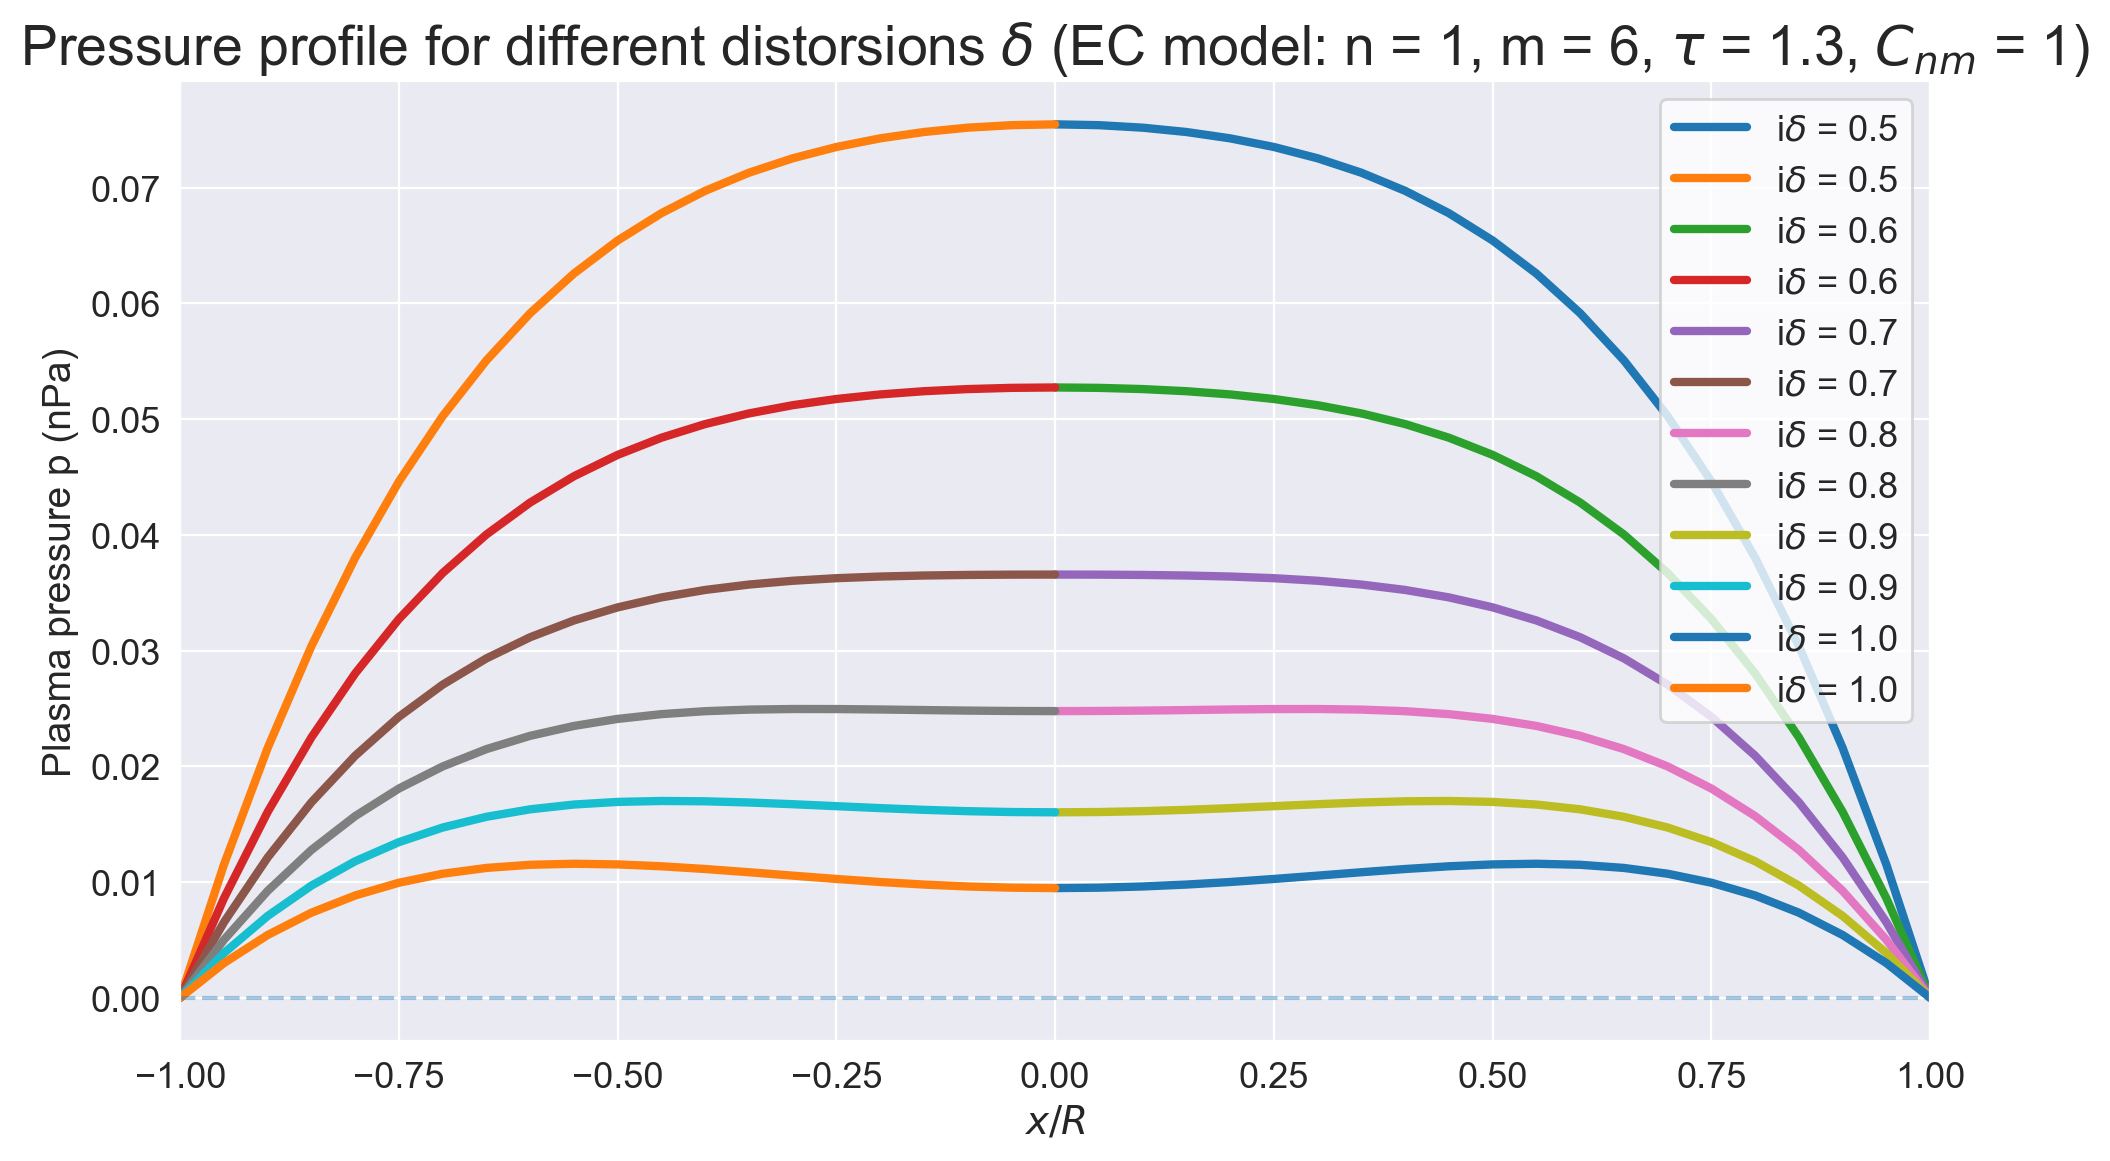

In [222]:
fig, ax = plt.subplots(figsize=(10,6), dpi = 200, tight_layout=True)

m = 6
cm = plt.get_cmap('rainbow')
#ax.set_prop_cycle('color', [cm(1.*i/m) for i in range(m)])
delta_aux = np.linspace(0.5, 1, num = m, endpoint = True)

r = np.linspace(0, 1, 21)

for d in delta_aux:
    [p_i, p] = pEC(r, d)
    ax.plot(r, p_i*1e9, label='i$\delta$ = ' + str(round(d, 1)), linewidth = 3)
    ax.plot(-r, p_i*1e9, label='i$\delta$ = ' + str(round(d, 1)), linewidth = 3)

plt.xlim(-1, 1)
plt.axhline(y = 0, linestyle = '--', alpha = 0.4)
plt.xlabel('$x/R$')
plt.ylabel('Plasma pressure p (nPa)')
plt.title('Pressure profile for different distorsions $\delta$ (EC model: n = ' + str(n) + ', m = ' + str(m) + ', $\\tau$ = 1.3, $C_{nm}$ = 1)')
plt.legend(facecolor = 'white')
plt.show()

C:\Users\ESTUDI~1\AppData\Local\Temp/ipykernel_20524/576381736.py:17: RuntimeWarning: divide by zero encountered in true_divide
  twist = B_phi/(r*B_z)
C:\Users\ESTUDI~1\AppData\Local\Temp/ipykernel_20524/576381736.py:17: RuntimeWarning: invalid value encountered in true_divide
  twist = B_phi/(r*B_z)
C:\Users\ESTUDI~1\AppData\Local\Temp/ipykernel_20524/576381736.py:17: RuntimeWarning: invalid value encountered in true_divide
  twist = B_phi/(r*B_z)
C:\Users\ESTUDI~1\AppData\Local\Temp/ipykernel_20524/576381736.py:17: RuntimeWarning: invalid value encountered in true_divide
  twist = B_phi/(r*B_z)
C:\Users\ESTUDI~1\AppData\Local\Temp/ipykernel_20524/576381736.py:17: RuntimeWarning: invalid value encountered in true_divide
  twist = B_phi/(r*B_z)
C:\Users\ESTUDI~1\AppData\Local\Temp/ipykernel_20524/576381736.py:17: RuntimeWarning: invalid value encountered in true_divide
  twist = B_phi/(r*B_z)
C:\Users\ESTUDI~1\AppData\Local\Temp/ipykernel_20524/576381736.py:17: RuntimeWarning: invalid

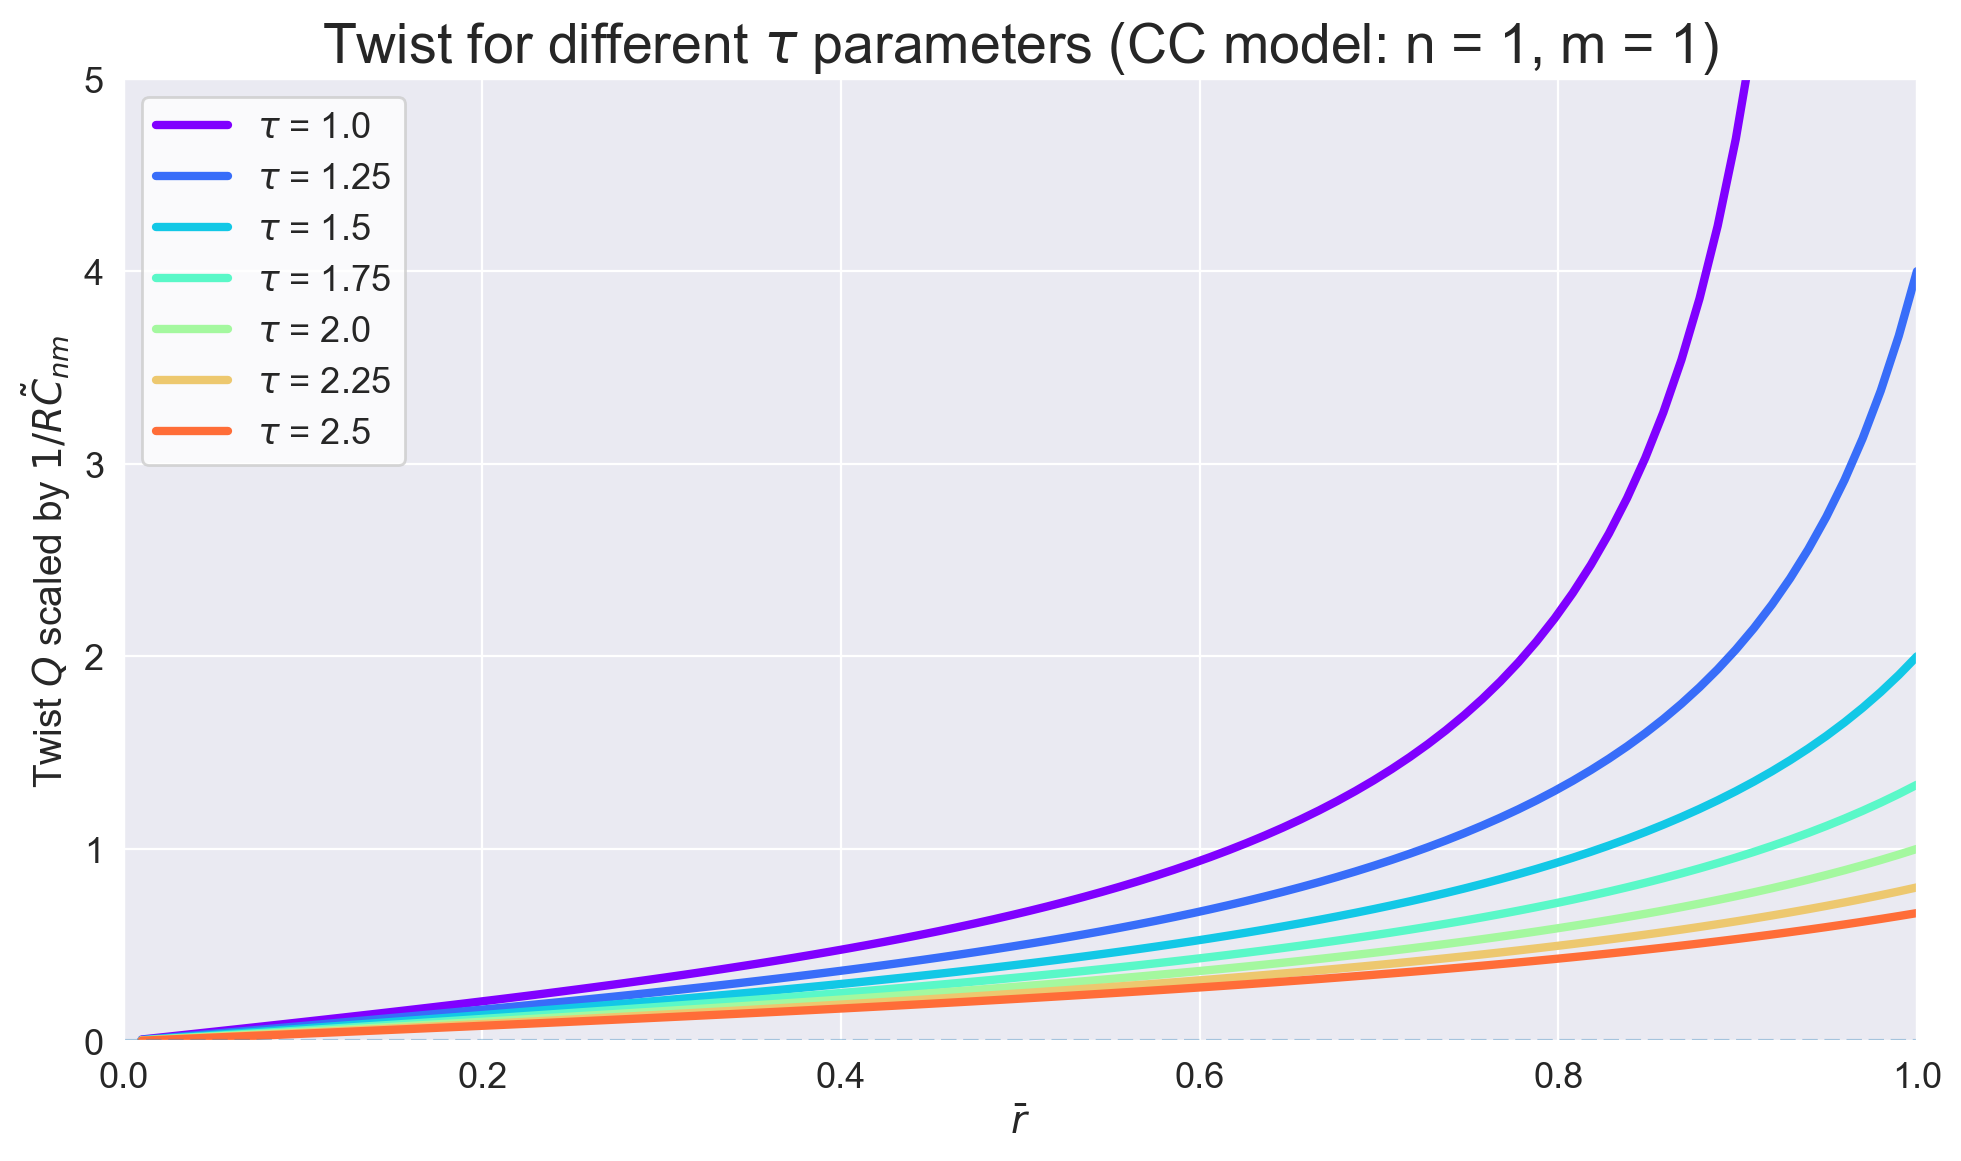

In [15]:
r = np.linspace(0, 1, 100, endpoint = True)
num = 7
tau_range = np.linspace(1, 2.5, num, endpoint = True)

n = 1
m = 1
Cnm = 1

fig, ax = plt.subplots(figsize=(10,6), dpi = 200, tight_layout=True)

cm = plt.get_cmap('rainbow')
ax.set_prop_cycle('color', [cm(1.*i/num) for i in range(num)])

for tau in tau_range:
    B_phi = (1/(Cnm*tau))*r**(m+1)
    B_z = 1 - (1/tau)*r**(n+1)
    twist = B_phi/(r*B_z)
    plt.plot(r, twist, linewidth = 3, label = '$\\tau$ = ' + str(round(tau, 3)))

plt.xlim(0, 1)
plt.ylim(0, 5)
plt.axhline(y = 0, linestyle = '--', alpha = 0.4)
plt.xlabel('$\\bar{r}$')
plt.ylabel('Twist $Q$ scaled by $1 /R \\tilde{C}_{nm}$')
plt.title('Twist for different $\\tau$ parameters (CC model: n = ' + str(n) + ', m = ' + str(m) + ')')
plt.legend(facecolor = 'white')
plt.show()